# Figure 3 - Ye et al. 2023

- Import dependencies and load the data

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

sns.set_style("ticks")

In [34]:
def plot_figure3c():
    # %%
    with open('../data/Figure3/ood_mice_zeroshot.pickle', 'rb') as f:
        pickle_obj = pickle.load(f)
    # %%
    proj_roots = list(pickle_obj.keys())
    proj_nicknames = ['smear mouse', 'ood maushaus', 'golden mouse']
    method_colors = plt.cm.get_cmap('magma_r', 6)

    fig, axes = plt.subplots(3, figsize=(4, 6))

    remove_nan = lambda x: x[~np.isnan(x)]
    dfs = []
    for i, proj_root in enumerate(pickle_obj):
        with_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['with_spatial_pyramid']['RMSE'], axis=(1, 2))
        with_spatial_pyramid = remove_nan(with_spatial_pyramid)
        without_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['without_spatial_pyramid']['RMSE'], axis=(1, 2))
        without_spatial_pyramid = remove_nan(without_spatial_pyramid)
        with_pyramid = ["without"] * len(without_spatial_pyramid) + ["with"] * len(with_spatial_pyramid)
        df_ = pd.DataFrame(
            np.array([
                np.r_[without_spatial_pyramid, with_spatial_pyramid],
                with_pyramid,
            ]).T,
            columns=['RMSE', 'cond'])
        df_['dataset'] = proj_nicknames[i]
        df_['RMSE'] = df_['RMSE'].astype("float64")
        df_['cond'] = df_['cond'].astype("category")
        df_['dataset'] = df_['dataset'].astype("category")
        dfs.append(df_)
        vp = sns.violinplot(
            df_, y='dataset', x='RMSE', hue='cond', split=True, hue_order=['without', 'with'],
            inner="quart", linewidth=1, palette={"without": ".85", "with": "#8AB5E7"},
            ax=axes[i], bw='scott',
        )
        sns.despine(ax=axes[i], left=True, top=True, right=True)
        axes[i].set_yticks([])
        axes[i].set_ylabel("")
        # axes[i].set_xlim(left=0)
    for i in (0, 1):
        axes[i].legend().remove()
    handles, labels = axes[2].get_legend_handles_labels()
    fig.legend(
        handles,
        ['Without spatial pyramid', 'With spatial pyramid'],
        frameon=False,
        ncol=1,
        # loc='lower right',
        fontsize='small',
        bbox_to_anchor=(0.9, 0.2),
    )
    axes[2].legend().remove()
    fig.savefig('Figure3c.png', dpi=600, bbox_inches='tight', pad_inches=0.05)

Plot distributions of detection errors with and without using spatial pyramid search

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_25971/2672746166.py:15: RuntimeWarning: Mean of empty slice
  with_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['with_spatial_pyramid']['RMSE'], axis=(1, 2))
/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_25971/2672746166.py:17: RuntimeWarning: Mean of empty slice
  without_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['without_spatial_pyramid']['RMSE'], axis=(1, 2))


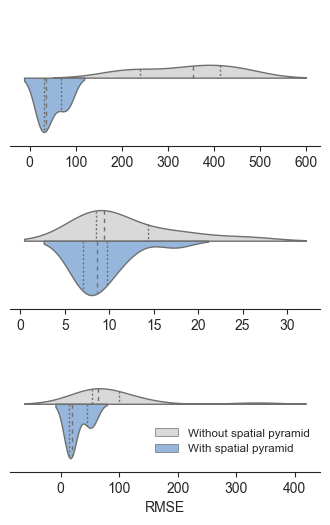

In [36]:
plot_figure3c()

In [57]:
def plot_figure3efgh():
    df = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5')

    video_names = ['m3v1mp4',
                   'maushaus_short',
                   'smear_mouse',
                   'golden_mouse'
                   ]

    metrics = ['area_score']
    fig, axs = plt.subplots(4, figsize=(9, 8), dpi=600)
    snap_iters = range(0, 11000, 1000)
    snapshot_list = [1000, 1000, 1000, 10000]
    for i, video_name in enumerate(video_names):
        areas_pre = df.loc[video_name].loc['before_adapt'].loc[metrics[0]].loc['200000']
        areas_post = df.loc[video_name].loc['after_adapt'][metrics[0]].loc[f'{snapshot_list[i]}']

        axs[i].plot(areas_pre, c='dimgray', alpha=.5, label='w/o adaptation')
        axs[i].plot(areas_post, c='lightcoral', label='w/ adaptation')
        scalebar = AnchoredSizeBar(
           axs[i].transData,
           size=100,
           label='100 frames',
           loc='lower center',
           frameon=False,
           borderpad=-1,
        )

        axs[i].set_xticklabels([])
        axs[i].xaxis.set_tick_params(length=0)
        axs[i].set_yticklabels([])
        axs[i].yaxis.set_tick_params(length=0)
        axs[i].add_artist(scalebar)
        sns.despine(ax=axs[i], top=True, right=True, left=True, bottom=True)
        axs[0].legend(frameon=False, loc='lower right')
    fig.savefig('Figure3efgh.png', dpi=600, bbox_inches='tight', pad_inches=0.05)

Changes in animal body area as a function of time

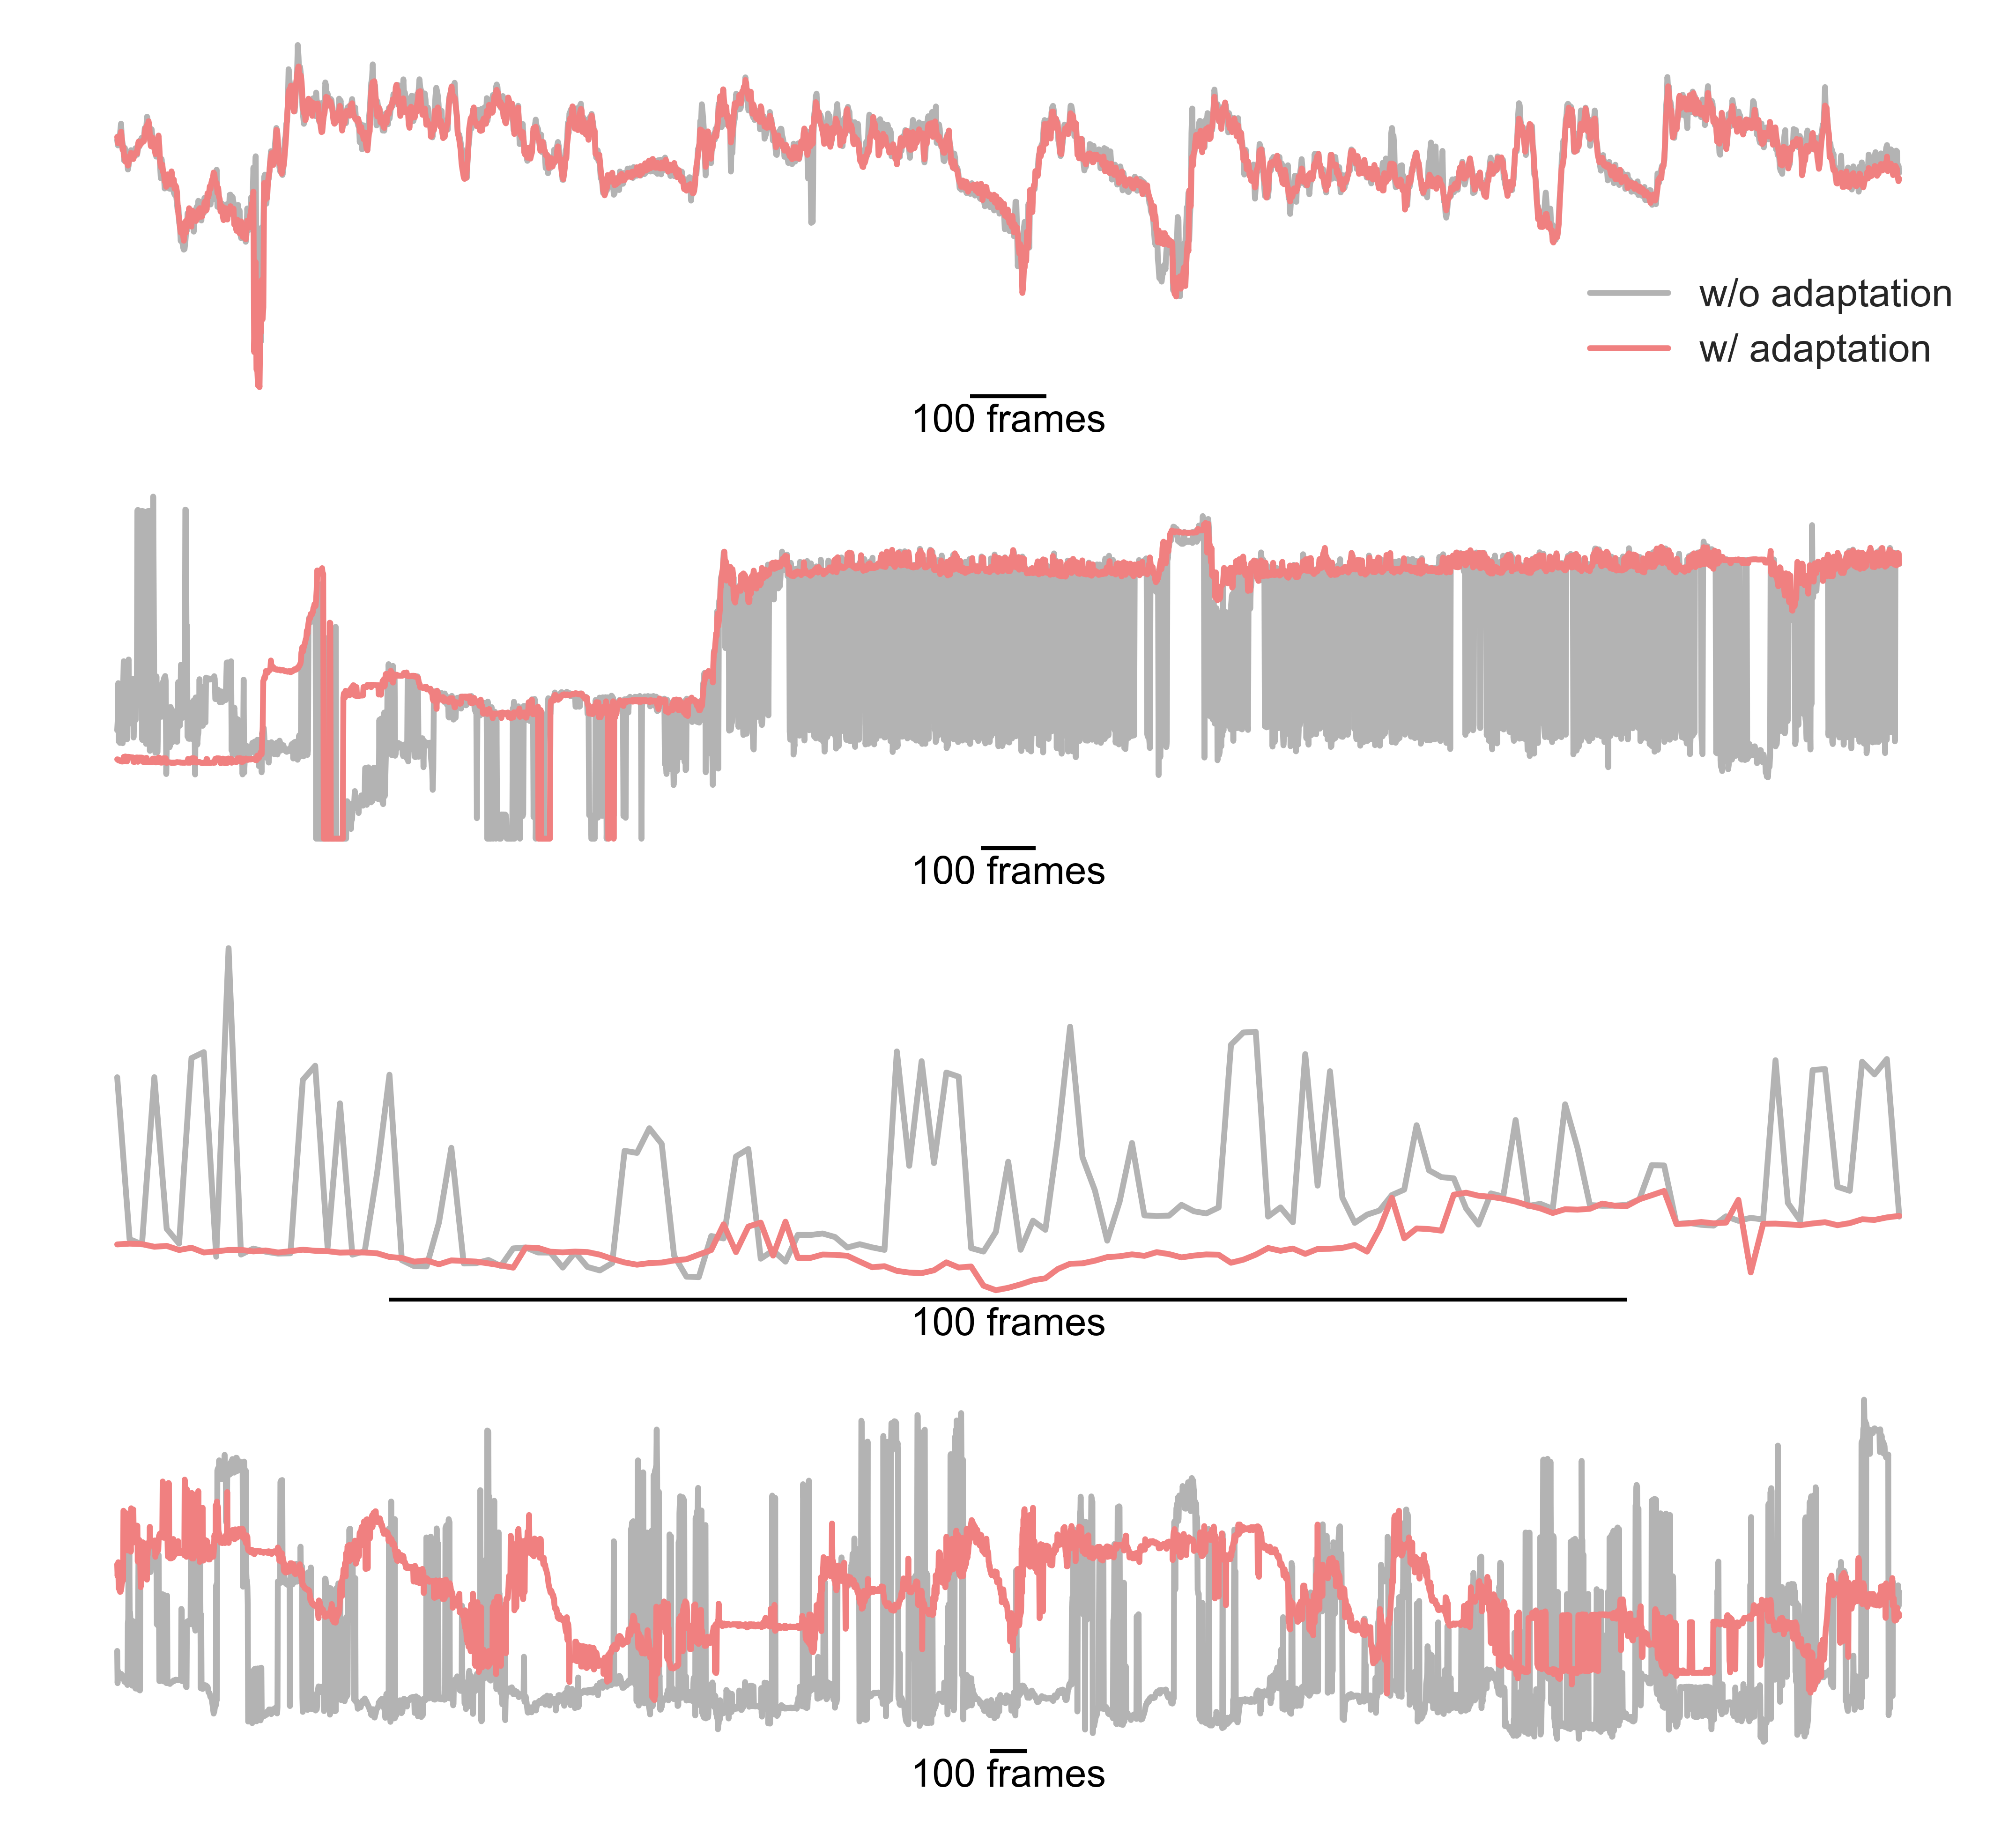

In [58]:
plot_figure3efgh()